In [53]:
%load_ext autoreload
%autoreload 2
import torch
import torchvision
from torchvision.transforms import transforms
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import confusion_matrix
from data_loader import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import model
torch.set_printoptions(linewidth=120)
from utils import *

from torch.utils.tensorboard import SummaryWriter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
torch.__version__

'1.10.2'

In [2]:
data_loader = DataLoader('fashion_mnist',batch_size=10)

In [3]:
train_set = data_loader.train_set # 60,000 images for fashion mnist

In [4]:
train_set.targets.bincount() # 10 classes each with 6,000 images

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [5]:
image, label = next(iter(train_set))

Text(0.5, 1.0, '9')

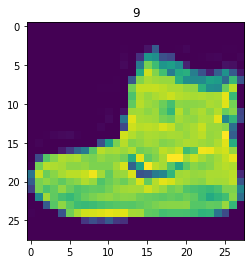

In [6]:
plt.imshow(image.squeeze())
plt.title(label)

In [7]:
images, labels = next(iter(data_loader.train_loader))

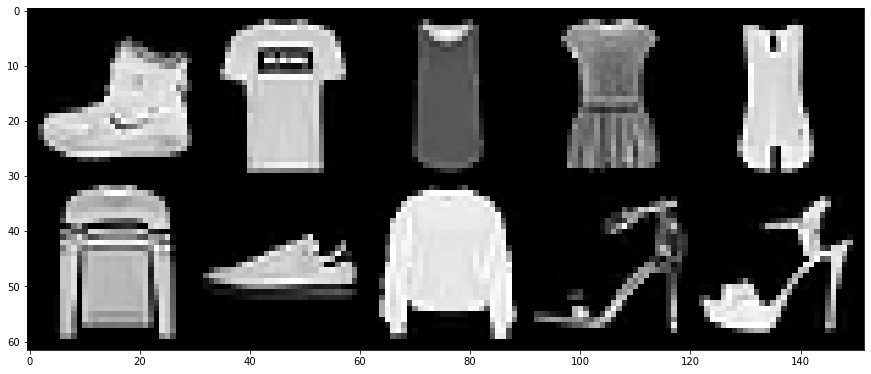

In [8]:
grid = torchvision.utils.make_grid(images,nrow=5)

plt.figure(figsize=(15,15))

plt.imshow(np.transpose(grid, (1,2,0)))

In [9]:
network = model.Network()

In [10]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [11]:
network.conv1.weight

Parameter containing:
tensor([[[[ 0.0194,  0.1929,  0.0057, -0.0829,  0.1379],
          [-0.1786,  0.0576,  0.1434,  0.0639,  0.1609],
          [ 0.1312,  0.1767,  0.1612,  0.1053, -0.1036],
          [ 0.1479, -0.0275, -0.0014, -0.0702, -0.0384],
          [ 0.1574,  0.0474,  0.0818, -0.0382, -0.0313]]],


        [[[-0.0384, -0.1271, -0.0165, -0.1458, -0.1639],
          [ 0.1368, -0.0877,  0.1509,  0.0386,  0.1253],
          [ 0.1216, -0.0609, -0.1728, -0.1794, -0.0308],
          [ 0.1826, -0.0718, -0.1754, -0.1165,  0.1657],
          [-0.0048,  0.1519,  0.1923,  0.0247, -0.0478]]],


        [[[-0.1005,  0.1320, -0.1473,  0.0415,  0.0197],
          [ 0.1626, -0.1180, -0.1022, -0.1267,  0.0393],
          [ 0.0596, -0.1190, -0.0844,  0.1072,  0.0563],
          [-0.1895,  0.0220,  0.0512,  0.1150,  0.0577],
          [ 0.0950, -0.1750,  0.1220,  0.1595, -0.0947]]],


        [[[ 0.0731, -0.1973,  0.1194,  0.1495,  0.1507],
          [-0.1003,  0.1364,  0.0745,  0.0091,  0.1050

In [12]:
# Let's turn the gradient off so that memory is saved
torch.set_grad_enabled(True)

In [13]:
# get a single image
image = images[0]
image.shape

torch.Size([1, 28, 28])

In [14]:
# add one dimension to pass it to the network
image = image.unsqueeze(0)
image.shape

torch.Size([1, 1, 28, 28])

In [15]:
pred = network(image)

In [16]:
pred.shape

torch.Size([1, 10])

In [17]:
pred

tensor([[ 0.0208, -0.0172, -0.0685, -0.0562,  0.1078, -0.0636,  0.0625,  0.0749, -0.0304,  0.0198]],
       grad_fn=<AddmmBackward0>)

In [18]:
pred = F.softmax(pred, dim=1)

In [19]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [ ]:
## The Training Process

# 1. Get batch from the training set
# 2. Pass this batch to the network
# 3. Calcuate the loss
# 4. Calculate gradient of loss functions w.r.t. the weights.
# 5. Update the weights using gradient descent
# 6. Repeat steps 1-5 for a single epoch.
# 7. 

In [20]:
preds = network(images)

In [21]:
labels.shape, preds.shape

(torch.Size([10]), torch.Size([10, 10]))

In [22]:
loss = F.cross_entropy(preds, labels) # applies softmax 
loss.item()

2.3269107341766357

In [23]:
network.conv1.weight.grad

In [24]:
loss.backward()

In [25]:
network.conv1.weight.grad, network.conv1.weight.grad.shape

(tensor([[[[ 3.2327e-03,  3.2459e-03,  1.2413e-03,  1.3834e-03,  2.2795e-03],
           [ 2.4948e-03,  1.1184e-03,  1.0291e-04,  5.7030e-04,  1.3452e-03],
           [ 8.5096e-04,  7.8245e-04,  5.5321e-04,  5.6190e-04,  2.4348e-03],
           [ 2.7642e-03,  3.7422e-03,  3.1147e-03,  2.2873e-03,  3.6017e-03],
           [ 3.9151e-03,  5.5434e-03,  4.3328e-03,  2.7018e-03,  3.3148e-03]]],
 
 
         [[[ 4.7350e-04, -1.2176e-03, -9.7237e-04,  4.2633e-04,  7.5316e-04],
           [-7.1705e-04, -1.3247e-03, -4.6853e-04,  1.0748e-03,  2.5616e-03],
           [ 7.4766e-05,  7.1704e-04,  1.1187e-03,  2.2281e-03,  3.2097e-03],
           [ 2.6648e-04,  1.0509e-03,  1.6731e-03,  1.5803e-03,  3.6064e-03],
           [ 8.4679e-04,  2.5909e-03,  2.7977e-03,  2.6919e-03,  3.5999e-03]]],
 
 
         [[[ 5.1840e-04, -1.1392e-04, -7.7201e-04, -2.2117e-03, -2.7135e-03],
           [-9.2172e-05, -6.3616e-05, -1.1425e-03, -2.5579e-03, -4.6408e-03],
           [-7.8821e-04, -7.1261e-04, -1.5321e-03, -

In [ ]:
# updating the weights

In [26]:
optimizer = optim.Adam(network.parameters(), lr = 1e-2)
print(loss.item())
print(get_num_correct(preds, labels))

optimizer.step()

preds = network(images)
loss = F.cross_entropy(preds,labels)
print(loss.item())
print(get_num_correct(preds,labels))

2.3269107341766357
0
2.2001259326934814
3


In [28]:
# Traininig Loop

epoch_loss = 0;
epoch_correct_predictions = 0;

for epoch in range(2):
    for batch in data_loader.train_loader:

        images, labels = batch # Get a batch

        preds = network(images) # Make predictions

        # Zero out the gradients for this batch
        optimizer.zero_grad();

        # Calulathe loss
        loss = F.cross_entropy(preds, labels);

        # Backward pass with autograd
        loss.backward()

        #update the weights
        optimizer.step()

        epoch_loss += loss.item();

        epoch_correct_predictions += get_num_correct(preds, labels)

    print(f"Epoch {epoch}, Loss = {epoch_loss} and number of correct prections were {epoch_correct_predictions}")

Epoch 0, Loss = 3389.4920900291763 and number of correct prections were 47709
Epoch 1, Loss = 6725.9280849325005 and number of correct prections were 95669


In [30]:
labels

tensor([4, 1, 7, 2, 8, 5, 1, 3, 0, 5])

In [44]:
classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag' ,'Ankle Boot']
cm = get_confusion_matrix(labels, preds, 10)

In [48]:
print(confusion_matrix(labels.detach().numpy(),preds.argmax(dim=1).detach().numpy()))


[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


Confusion matrix, without normalization
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


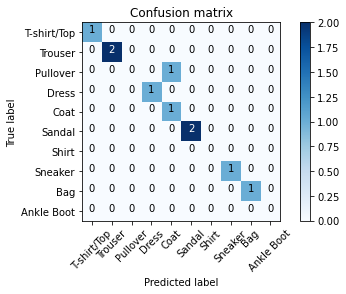

In [49]:
plot_confusion_matrix(cm,classes)

In [55]:
tb = SummaryWriter()

network = model.Network()
images, labels = next(iter(data_loader.train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()